Feature Importances EDA

In [8]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load feature importances dataset

df_imp = pd.read_csv("HDB_Resale_Prices_Features_Importances.csv")

# Summary 
df_imp.head()

,feature,importance
0,floor_area_sqm,0.425893
1,pt_time_to_cbd_min_adj,0.166683
2,year,0.131115
3,lease_commence_year,0.093945
4,pt_time_to_cbd_min,0.011263


Top 10 Features 

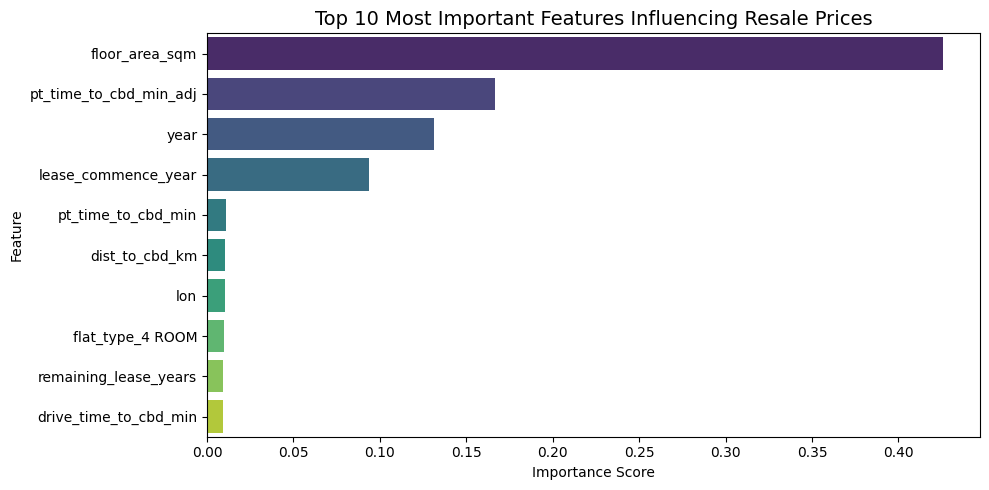

In [4]:
top10 = df_imp.head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top10, x='importance', y='feature', hue = 'feature', palette='viridis')
plt.title("Top 10 Most Important Features Influencing Resale Prices", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Importance by category group

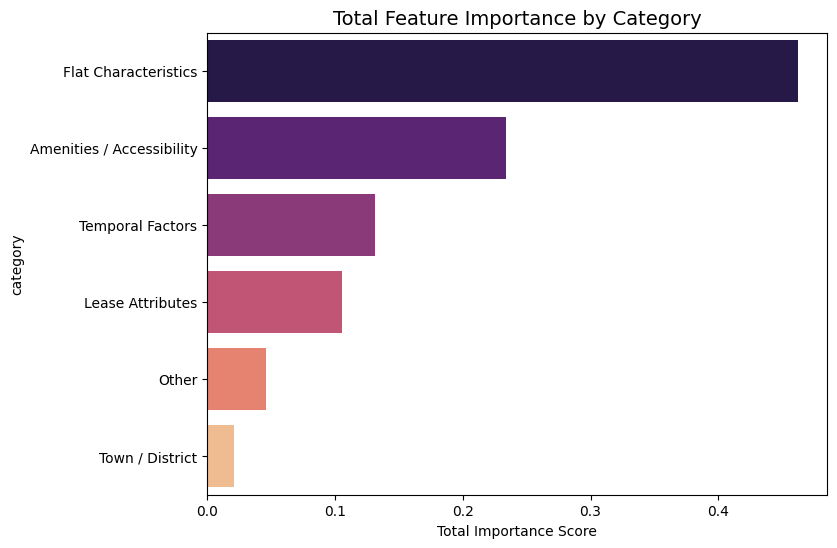

In [12]:
# Create simple feature categories based on naming patterns
def assign_category(x):
    x = x.lower()
    if 'dist' in x or 'cbd' in x or 'mall' in x or 'mrt' in x:
        return 'Amenities / Accessibility'
    elif 'flat' in x or 'floor' in x or 'sq' in x:
        return 'Flat Characteristics'
    elif 'lease' in x or 'commence' in x:
        return 'Lease Attributes'
    elif 'town' in x:
        return 'Town / District'
    elif 'year' in x:
        return 'Temporal Factors'
    else:
        return 'Other'

df_imp['category'] = df_imp['feature'].apply(assign_category)

# Group importance scores by category
df_group = df_imp.groupby('category')['importance'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(
    x=df_group.values,
    y=df_group.index,
    hue=df_group.index,
    dodge=False,
    legend=False,
    palette="magma"
)
plt.title("Total Feature Importance by Category", fontsize=14)
plt.xlabel("Total Importance Score")
plt.show()

Category totals

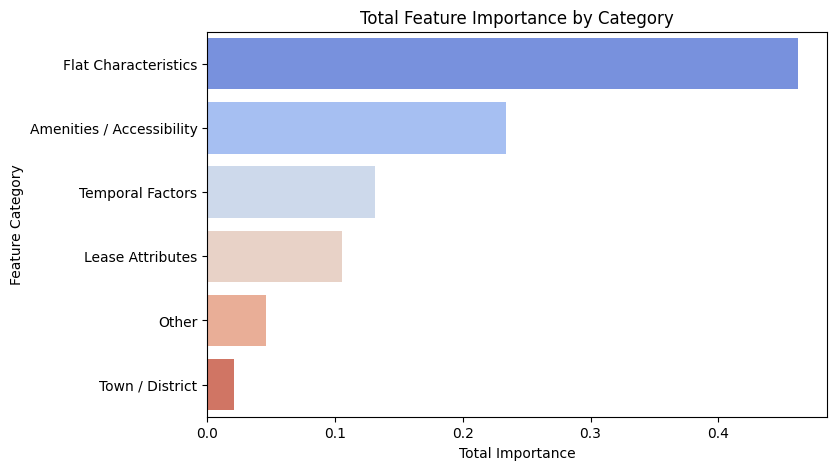

In [14]:
category_summary = df_imp.groupby("category")["importance"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=category_summary.values,
    y=category_summary.index,
    hue=category_summary.index,   # hue must be defined
    dodge=False,
    legend=False,
    palette="coolwarm"
)
plt.title("Total Feature Importance by Category")
plt.xlabel("Total Importance")
plt.ylabel("Feature Category")
plt.show()

Cumulative Feature Importance Plot

“How accurately can these factors predict prices?”

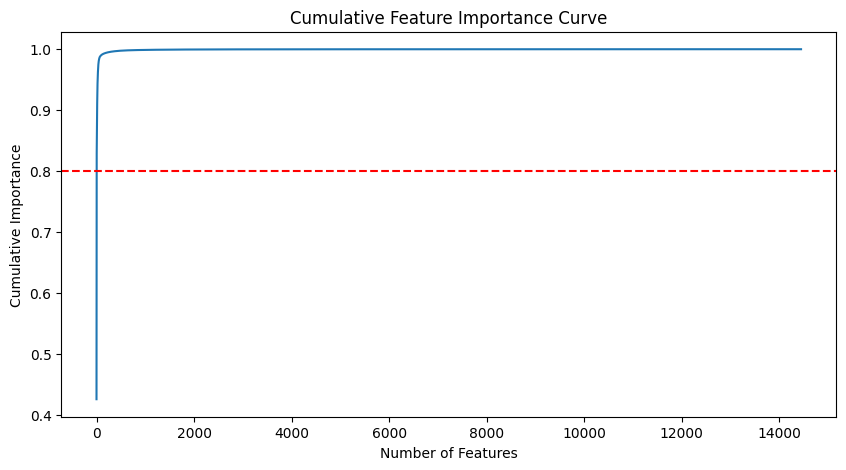

In [15]:
df_imp_sorted = df_imp.sort_values('importance', ascending=False)
df_imp_sorted['cumulative'] = df_imp_sorted['importance'].cumsum()

plt.figure(figsize=(10,5))
plt.plot(df_imp_sorted['cumulative'].values)
plt.axhline(0.80, color='red', linestyle='--')
plt.title("Cumulative Feature Importance Curve")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.show()

Category-level % Contribution Chart

“Which types of attributes matter more — physical size, accessibility, or lease attributes?”

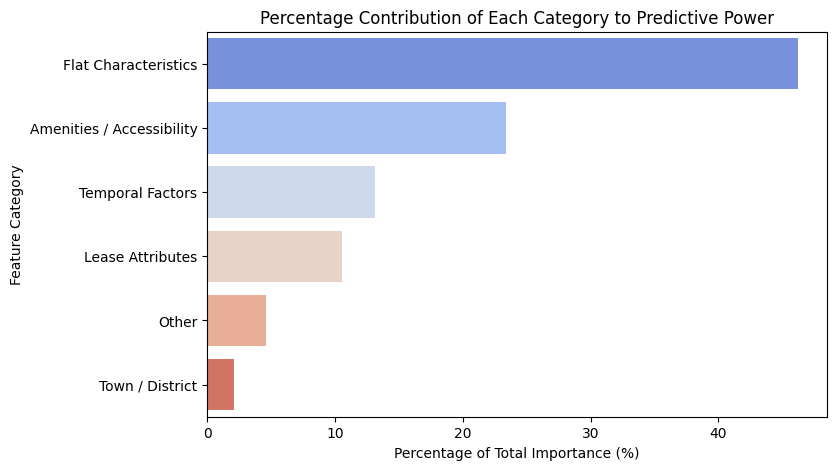

In [29]:
cat_pct = (category_summary / category_summary.sum()) * 100

plt.figure(figsize=(8,5))
sns.barplot(
    x=cat_pct.values,
    y=cat_pct.index,
    hue=cat_pct.index,      # required to avoid seaborn deprecation warning
    legend=False,
    dodge=False,
    palette="coolwarm"
)
plt.title("Percentage Contribution of Each Category to Predictive Power")
plt.xlabel("Percentage of Total Importance (%)")
plt.ylabel("Feature Category")
plt.show()

Correlation Between Feature Importance & Actual Prices

Show which features are both high importance and highly correlated with resale price

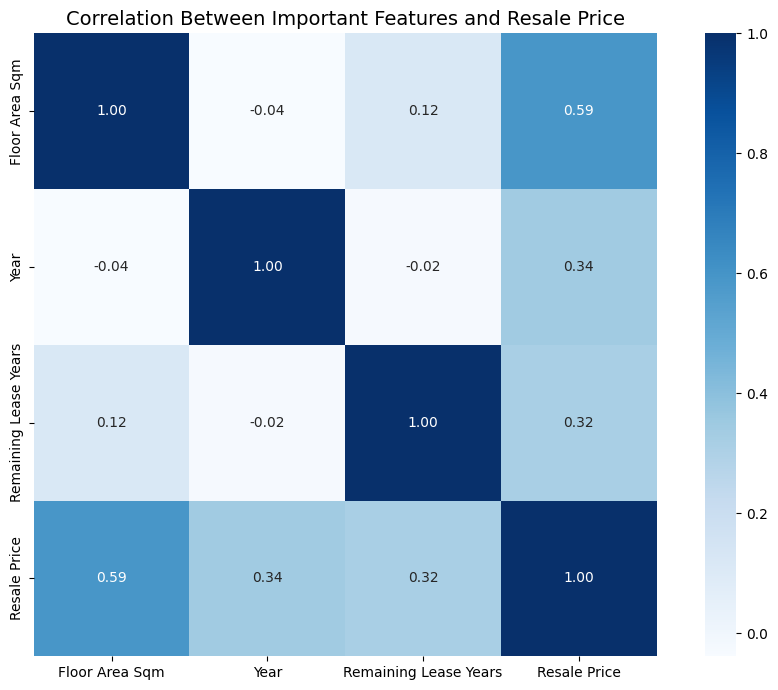

In [25]:
# Load data engineered dataset
df = pd.read_csv("HDB_Resale_Prices_Data_Engineered.csv")

# Remove resale_price if it appears as a feature
df_imp = df_imp[df_imp['feature'] != 'resale_price']

# Top 10 most important features from feature importances CSV
top_features = df_imp.head(10)['feature'].tolist()

# Check which of these exist in the engineered dataset
available_features = [f for f in top_features if f in df.columns]
missing_features   = [f for f in top_features if f not in df.columns]

# Build a subset using only features that exist + resale_price
corr_subset = df[available_features + ['resale_price']]

# Correlation matrix
corr_matrix = corr_subset.corr()

# Correlation values with resale_price (sorted)
corr_with_price = corr_matrix['resale_price'].sort_values(ascending=False)
corr_with_price

# Prettify labels
label_map = {col: col.replace('_', ' ').title() for col in corr_matrix.columns}
label_map['resale_price'] = 'Resale Price'   # custom rename

corr_matrix_pretty = corr_matrix.rename(index=label_map, columns=label_map)

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix_pretty, 
    annot=True, 
    cmap='Blues', 
    fmt=".2f", 
    square=True
)
plt.title("Correlation Between Important Features and Resale Price", fontsize=14)
plt.tight_layout()
plt.show()